<a href="https://colab.research.google.com/github/putiwindra/putiwindra/blob/main/070_PUTI_WINDRAHMATULLAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **PUTI WINDRAHMATULLAH**
* **120450070**
* **RB**
* **UTS SSD**




In [ ]:
import pandas as pd
import numpy as np


from google.colab import files
filenya = files.upload()

Saving covid_uts.csv to covid_uts (5).csv


In [ ]:
filenya

{'covid_uts.csv': b'Negara,Tanggal,Varian,N_Positif\nEgypt,2020-05-11,Alpha,0\nEgypt,2020-05-11,Beta,0\nEgypt,2020-05-11,Gamma,0\nEgypt,2020-05-11,Mu,0\nEgypt,2020-05-11,Omicron,0\nEgypt,2020-05-25,Alpha,0\nEgypt,2020-05-25,Beta,0\nEgypt,2020-05-25,Gamma,0\nEgypt,2020-05-25,Mu,0\nEgypt,2020-05-25,Omicron,0\nEgypt,2020-06-08,Alpha,0\nEgypt,2020-06-08,Beta,0\nEgypt,2020-06-08,Gamma,0\nEgypt,2020-06-08,Mu,0\nEgypt,2020-06-08,Omicron,0\nEgypt,2020-06-22,Alpha,0\nEgypt,2020-06-22,Beta,0\nEgypt,2020-06-22,Gamma,0\nEgypt,2020-06-22,Mu,0\nEgypt,2020-06-22,Omicron,0\nEgypt,2020-07-06,Alpha,0\nEgypt,2020-07-06,Beta,0\nEgypt,2020-07-06,Gamma,0\nEgypt,2020-07-06,Mu,0\nEgypt,2020-07-06,Omicron,0\nEgypt,2020-07-20,Alpha,0\nEgypt,2020-07-20,Beta,0\nEgypt,2020-07-20,Gamma,0\nEgypt,2020-07-20,Mu,0\nEgypt,2020-07-20,Omicron,0\nEgypt,2020-08-03,Alpha,0\nEgypt,2020-08-03,Beta,0\nEgypt,2020-08-03,Gamma,0\nEgypt,2020-08-03,Mu,0\nEgypt,2020-08-03,Omicron,0\nEgypt,2020-08-17,Alpha,0\nEgypt,2020-08-17,Beta,0\n

In [ ]:
import io
df = pd.read_csv(io.StringIO(filenya['covid_uts.csv'].decode('utf-8')))
print (df)

NameError: ignored

In [ ]:
df.head()

,Negara,Tanggal,Varian,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0


In [ ]:
df.tail()

,Negara,Tanggal,Varian,N_Positif
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0
1489,Malaysia,2021-12-27,Omicron,5


**1a.[10 poin] Jumlah dan List Negara dalam dataset tersebut**

In [ ]:
negara=df['Negara'].unique()
print('Jumlah Negara:', len(negara))
print('list negara:')
for country in enumerate(negara):
  print(country[0]+1, country[1])


Jumlah Negara: 7
list negara:
1 Egypt
2 Finland
3 Germany
4 Indonesia
5 Italy
6 Japan
7 Malaysia


**1b.[10 poin] Jumlah dan List Varian Covid dalam dataset tersebut**

In [ ]:
varian=df['Varian'].unique()
print('Jumlah Variant covid:', len(varian))
print('list variant covid:')
for variants in enumerate(varian):
  print(variants[0]+1, variants[1])

Jumlah Variant covid: 5
list variant covid:
1 Alpha
2 Beta
3 Gamma
4 Mu
5 Omicron


**2.Lakukan data wrangling kemudian visualisasikan data berikut sesuai dengan penyajian data yang
tepat:**

**a)Jumlah kasus positif Negara Indonesia per tanggal nya**

In [ ]:
df2 = df.drop( df[df['Varian']=='0'].index )
df_date = df2[['Negara','Tanggal','N_Positif']].groupby('Tanggal').sum()
df_date.reset_index(inplace=True)
df_date['Tanggal'] = pd.to_datetime(df_date['Tanggal'])
df_date['Tanggal'] = df_date['Tanggal'].apply(lambda x: '{year}-{month}'.format(year = x.year, month = x.month))
df_day = df_date.groupby(['Tanggal']).sum()
df_day

,N_Positif
Tanggal,
2020-10,4
2020-11,4
2020-12,57
2020-5,0
2020-6,0
2020-7,0
2020-8,0
2020-9,0
2021-1,1375


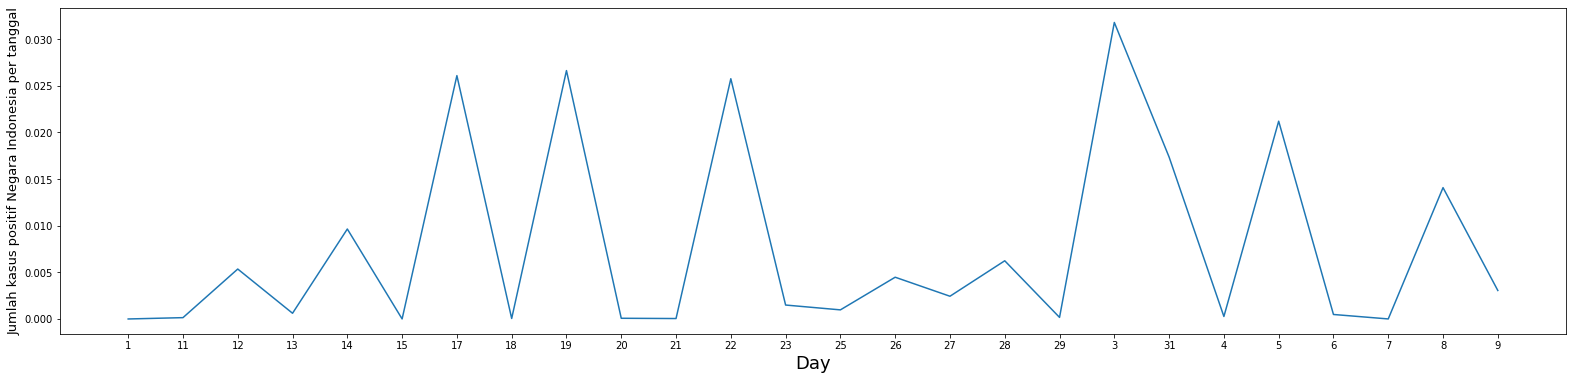

In [ ]:
import matplotlib.pyplot as plt

df2 = df.drop( df[df['Varian']=='0'].index )
df_date = df2[['Negara','Tanggal','N_Positif']].groupby('Tanggal').sum()
df_date.reset_index(inplace=True)
df_date['Tanggal'] = pd.to_datetime(df_date['Tanggal'])
df_date['Tanggal'] = df_date['Tanggal'].apply(lambda x: '{day}'.format(day = x.day) )
df_day = df_date.groupby(['Tanggal']).sum()
df_day

plt.figure(figsize=(27,6))
plt.plot(df_day['N_Positif'].apply(lambda x:x/10**6))
plt.xlabel('Day',fontsize=18)
plt.ylabel('Jumlah kasus positif Negara Indonesia per tanggal',fontsize=13)
plt.show()

**b)[5 poin] Rata Rata varian Beta tiap bulan nya**

In [ ]:
df2 = df.drop(df[df['Varian']=='Beta'].index)
df_Tanggal = df2[['Tanggal','N_Positif']].groupby('Tanggal').mean()
df_Tanggal.reset_index(inplace=True)
df_Tanggal['Tanggal'] = pd.to_datetime(df_Tanggal['Tanggal'])
df_Tanggal['Tanggal'] = df_Tanggal['Tanggal'].apply(lambda x: '{year}-{month}'.format(year = x.year, month = x.month))
df_month = df_Tanggal.groupby(['Tanggal']).mean()
df_month

,N_Positif
Tanggal,
2020-10,0.071429
2020-11,0.071429
2020-12,0.964286
2020-5,0.000000
2020-6,0.000000
2020-7,0.000000
2020-8,0.000000
2020-9,0.000000
2021-1,15.726190


**3. [20 poin] Lakukan Data Wrangling sehingga menghasilkan tabel berikut!**

In [ ]:
df3 = df2.groupby(['Negara','Varian']).sum()
df3

N_Positif
Negara    Varian            
Egypt     Alpha           29
          Gamma            0
          Mu               0
          Omicron          1
Finland   Alpha         6800
          Gamma           19
          Mu               5
          Omicron          0
Germany   Alpha       104138
          Gamma          858
          Mu              17
          Omicron       2270
Indonesia Alpha           81
          Gamma            0
          Mu               0
          Omicron        130
Italy     Alpha        26877
          Gamma         2488
          Mu              83
          Omicron        526
Japan     Alpha        49841
          Gamma          120
          Mu               3
          Omicron        150
Malaysia  Alpha           33
          Gamma            0
          Mu               0
          Omicron         17

In [ ]:
df4=df3.query("Varian=='Omicron' | Varian=='Alpha' | Varian=='Beta'")
df4.reset_index(inplace=True)
df4

,Negara,Varian,N_Positif
0,Egypt,Alpha,29
1,Egypt,Omicron,1
2,Finland,Alpha,6800
3,Finland,Omicron,0
4,Germany,Alpha,104138
5,Germany,Omicron,2270
6,Indonesia,Alpha,81
7,Indonesia,Omicron,130
8,Italy,Alpha,26877
9,Italy,Omicron,526


In [ ]:
locations = df4[['Negara']]
negara = locations['Negara'].unique()

alpas = df4[df4['Varian']=='Alpha']
a = alpas[['N_Positif']].values.flatten()

omicrons = df4[df4['Varian']=='Omicron']
b = omicrons[['N_Positif']].values.flatten()

beta = df4[df4['Varian']=='Beta']
c = beta[['N_Positif']].values.flatten()

datas = {
    'Negara': negara,
    'Varian_Omicron': b,
    'Varian_Alpha' : a,
    'Varian_Beta' : c,
}

df_new= pd.DataFrame(datas)
df_new

ValueError: ignored

**4.)[20 poin] Lakukan perhitungan Similarity/Dissimilarity dengan mendefinisikan similarity sebagai
jarak r yang dihitung dengan menggunakan euclidean distance pada negara negara berikut:
* Indonesia
* Malaysia
* Japan
* Italy
* Finland
Buat distance matriks untuk 5 negara tersebut! Negara Manakah yang paling similar dengan
Indonesia ?**

In [ ]:
countries = ['Indonesia','Malaysia','Japan','Italy','Finland']
df5 = df_new.query(' Negara in @countries' )
df5.reset_index(inplace = True)
df5

,index,Negara,Varian_Omicron,Varian_Alpha,Varian_Beta
0,1,Finland,0,6800,1213
1,3,Indonesia,130,81,22
2,4,Italy,526,26877,116
3,5,Japan,150,49841,101
4,6,Malaysia,17,33,273


In [ ]:
temps = df5[['Varian_Omicron','Varian_Alpha','Varian_Beta']].values
temps

array([[    0,  6800,  1213],
       [  130,    81,    22],
       [  526, 26877,   116],
       [  150, 49841,   101],
       [   17,    33,   273]])

In [ ]:
def euclid(x,y):
    return np.linalg.norm(x-y)

lneg = len(temps)
d_matrix = [ [ round(euclid (temps[i], temps[j]) , 2 ) for j in range(lneg) ] for i in range(lneg) ]
d_matrix

[[0.0, 6824.98, 20113.83, 43055.62, 6832.0],
 [6824.98, 0.0, 26799.09, 49760.07, 279.42],
 [20113.83, 26799.09, 0.0, 22967.08, 26849.28],
 [43055.62, 49760.07, 22967.08, 0.0, 49808.47],
 [6832.0, 279.42, 26849.28, 49808.47, 0.0]]

In [ ]:
lnegaras = df5[['Negara']].values.flatten()
df_akhir = pd.DataFrame(d_matrix, columns = lnegaras, index = lnegaras)
df_akhir

,Finland,Indonesia,Italy,Japan,Malaysia
Finland,0.00,6824.98,20113.83,43055.62,6832.00
Indonesia,6824.98,0.00,26799.09,49760.07,279.42
Italy,20113.83,26799.09,0.00,22967.08,26849.28
Japan,43055.62,49760.07,22967.08,0.00,49808.47
Malaysia,6832.00,279.42,26849.28,49808.47,0.00
